# Box Office Predictions

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import sklearn
import ast
from scipy.stats import randint
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
test

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."
5,3006,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0120238,en,SubUrbia,A group of suburban teenagers try to support e...,8.679350,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/7/96,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,SubUrbia,"[{'id': 10183, 'name': 'independent film'}]","[{'cast_id': 4, 'character': 'Pony', 'credit_i...","[{'credit_id': '52fe4576c3a368484e05c901', 'de..."
6,3007,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",NaN,tt1517177,de,Drei,Hanna and Simon are in a 20 year marriage with...,4.898882,...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",12/23/10,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Imagine the possibilities.,Three,"[{'id': 572, 'name': 'sex'}, {'id': 154937, 'n...","[{'cast_id': 2, 'character': 'Hanna', 'credit_...","[{'credit_id': '52fe485bc3a36847f816358d', 'de..."
7,3008,NaN,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://www.tigger.com,tt0220099,en,The Tigger Movie,"As it happens, everybody - Pooh, Piglet, Eeyor...",7.023414,...,"[{'iso_316

In [4]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Et snitt av datasettet. Det er 23 kolonner og mange forskjellige datatyper som strings, dictionaries, og noen ints/floats. Her må vi finne løsninger som tar hensyn til de forskjellige datatypene. 

Det ser også ut som at mye data som mangler. La oss se nærmere på det. 

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

Det er 3000 entries. Mange kolonner mangler data. Man kan se at kolonnene ``belongs_to_collection`` og ``homepage`` mangler spesielt mye data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CB82767B8>,
      dtype=object)

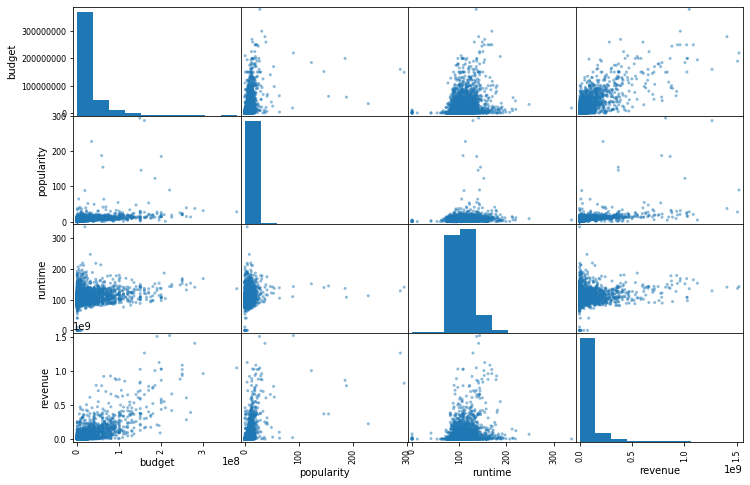

In [6]:
attributes = ["budget", "popularity", "runtime", "revenue"]
scatter_matrix(train[attributes], figsize=(12,8))

Her begynner vi å lete etter sammenhenger mellom attributtene som har type int og float. Det er mulig å se en lineær sammengeng mellom *budget* og *revenue*, som gir mening. 

Vi kan ta en nærmere titt på den:

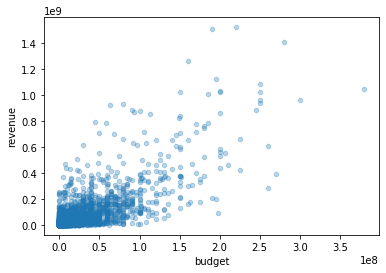

In [7]:
train.plot(kind="scatter", x="budget", y="revenue", alpha=0.3)

Her kan man se at budget ofte runner av til nærmeste runde tall, siden mange entries have the exact same budget. 

But we also have to look at the columns that are not initially number types, and see if there are some other correlations with revenue. To do this, we have to prepare the data.

## Preparing the data

In [8]:
train_copy = train.copy()
test_copy = test.copy()

In [9]:
def collectionBooleanifier(collection):

    new_collection = []

    new_val = 0
    for x in collection:
        if x != x:
            new_val = 0
        else:
            new_val = 1
        new_collection.append(new_val) 
        
    return new_collection

In [10]:
train_copy['has_collection'] = collectionBooleanifier(train_copy['belongs_to_collection'])
train_copy['has_homepage'] = collectionBooleanifier(train_copy['homepage'])
test_copy['has_collection'] = collectionBooleanifier(test_copy['belongs_to_collection'])
test_copy['has_homepage'] = collectionBooleanifier(test_copy['homepage'])

train_copy = train_copy.drop(['belongs_to_collection'], axis=1)
train_copy = train_copy.drop(['homepage'], axis=1)
test_copy = test_copy.drop(['belongs_to_collection'], axis=1)
test_copy = test_copy.drop(['homepage'], axis=1)

In [11]:
train_copy.head(-1)

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,has_collection,has_homepage
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,1
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,1
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0
5,6,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,NaN,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,0,0
6,7,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,"[{'name': 'Ghost House Pictures', 'id': 768}, ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,0,1
7,8,0,"[{'id': 99, 'name': 'Documentary'}]",tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,NaN,...,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,0,0
8,9,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam..."

#https://image.tmdb.org/t/p/w600_and_h900_bestv2 + etterfulgt av bilde-url 

In [12]:
def language_encoder(column, length):

    new_lang = [0] * length
    
    i = 0
    for x in column:
        if x == x:
            ds = ast.literal_eval(x)
            if any(d['iso_639_1'] == 'en' for d in ds): 
                new_lang[i] = 1
        else:
            new_lang[i] = 1 #setter den til engelsk hvis språk ikke er satt. (fordi det er flest engelske)
        i+=1
    
    return new_lang

In [13]:
#https://image.tmdb.org/t/p/w600_and_h900_bestv2 + etterfulgt av bilde-url 

In [14]:
train_copy['has_english'] = language_encoder(train_copy['spoken_languages'], 3000)
test_copy['has_english'] = language_encoder(test_copy['spoken_languages'], 4398)

train_copy = train_copy.drop(['spoken_languages'], axis=1)
test_copy = test_copy.drop(['spoken_languages'], axis=1)

In [15]:
train_copy['cast'][0]

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

In [16]:
train_copy['crew'][0]

'[{\'credit_id\': \'59ac067c92514107af02c8c8\', \'department\': \'Directing\', \'gender\': 0, \'id\': 1449071, \'job\': \'First Assistant Director\', \'name\': \'Kelly Cantley\', \'profile_path\': None}, {\'credit_id\': \'52fe4ee7c3a36847f82afad7\', \'department\': \'Directing\', \'gender\': 2, \'id\': 3227, \'job\': \'Director\', \'name\': \'Steve Pink\', \'profile_path\': \'/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg\'}, {\'credit_id\': \'5524ed25c3a3687ded000d88\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Writer\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed2d925141720c001128\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Characters\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed3d92514166c1004a5d\', \'department\': \'Production\', \'gender\': 2, \'id\': 57822, \'job\': \'Producer\', \'name\': \'Andrew Panay\', \

In [17]:
train_copy['Keywords'][0]

"[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]"

In [18]:
def cast_counter(column):
    cast_size = [0] * len(column)
    male_cast_size = [0] * len(column)
    female_cast_size = [0] * len(column)
    uncategorized_cast_size = [0] * len(column)
    
    i = 0
    for cast_list_str in column:
        
        if cast_list_str == cast_list_str:
            cast_list = ast.literal_eval(cast_list_str)
            cast_size[i] = len(cast_list)
            
            for cast in cast_list:
                if(cast['gender'] == 1):
                    female_cast_size[i] += 1
                elif(cast['gender'] == 2):
                    male_cast_size[i] += 1
                else:
                    uncategorized_cast_size[i] += 1
            
        else:
            cast_size[i] = np.nan
            female_cast_size[i] = np.nan
            male_cast_size[i] = np.nan
            uncategorized_cast_size[i] = np.nan
        i+=1
    
    return cast_size, female_cast_size, male_cast_size, uncategorized_cast_size

In [19]:
def attribute_counter(column):
    attribute_size = [0] * len(column)
    
    i = 0
    for attribute_list_str in column:
        
        if attribute_list_str == attribute_list_str:
            attribute_list = ast.literal_eval(attribute_list_str)
            attribute_size[i] = len(attribute_list)           
        else:
            attribute_size[i] = np.nan
        i+=1
    
    return attribute_size

In [20]:
train_copy['cast_size'], train_copy['female_cast_size'], train_copy['male_cast_size'], train_copy['uncategorized_cast_size'] = cast_counter(train_copy['cast'])
train_copy = train_copy.drop('cast', axis = 1)

test_copy['cast_size'], test_copy['female_cast_size'], test_copy['male_cast_size'], test_copy['uncategorized_cast_size'] = cast_counter(test_copy['cast'])
test_copy = test_copy.drop('cast', axis = 1)

In [21]:
def attribute_length(column, length) :
    new_column = [0] * length
    
    i = 0
    for data_attribute in column:
        if data_attribute == data_attribute:
            new_column[i] = len(data_attribute)
        else:
            new_column[i] = np.nan
        i += 1       
        
    return new_column        

In [22]:
train_copy['title_length'] = attribute_length(train_copy['title'], 3000)
train_copy['tagline_length'] = attribute_length(train_copy['tagline'], 3000)
train_copy['crew_size'] = attribute_counter(train_copy['crew'])
train_copy['num_keywords'] = attribute_counter(train_copy['Keywords'])

test_copy['title_length'] = attribute_length(test_copy['title'], 4398)
test_copy['tagline_length'] = attribute_length(test_copy['tagline'], 4398)
test_copy['crew_size'] = attribute_counter(test_copy['crew'])
test_copy['num_keywords'] = attribute_counter(test_copy['Keywords'])
#train_copy['overview_length'] = attribute_length(train_copy['overview'])

In [23]:
train_copy

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,has_homepage,has_english,cast_size,female_cast_size,male_cast_size,uncategorized_cast_size,title_length,tagline_length,crew_size,num_keywords
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,0,1,24.0,8.0,10.0,6.0,22,52.0,72.0,4.0
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,0,1,20.0,10.0,10.0,0.0,40,60.0,9.0,4.0
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,1,1,51.0,7.0,13.0,31.0,8,47.0,64.0,12.0
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,1,1,7.0,1.0,2.0,4.0,7,NaN,3.0,7.0
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,...,0,0,4.0,0.0,4.0,0.0,10,NaN,2.0,NaN
5,6,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,NaN,...,0,1,4.0,0.0,2.0,2.0,38,NaN,11.0,NaN
6,7,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,"[{'name': 'Ghost House Pictures', 'id': 768}, ...",...,1,1,14.0,3.0,7.0,4.0,14,36.0,77.0,NaN
7,8,0,"[{'id': 99, 'name': 'Documentary'}]",tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,NaN,...,0,1,4.0,0.0,1.0,3.0,12,37.0,1.0,7.0
8,9,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,0,1,12.0,1.0,6.0,5.0,22,27.0,8.0,4.0
9,10,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,/xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 97}]",...,0,1,20.0,5.0,13.0,2.0,13,40.0,11.0,2.0


In [24]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
id                         3000 non-null int64
budget                     3000 non-null int64
genres                     2993 non-null object
imdb_id                    3000 non-null object
original_language          3000 non-null object
original_title             3000 non-null object
overview                   2992 non-null object
popularity                 3000 non-null float64
poster_path                2999 non-null object
production_companies       2844 non-null object
production_countries       2945 non-null object
release_date               3000 non-null object
runtime                    2998 non-null float64
status                     3000 non-null object
tagline                    2403 non-null object
title                      3000 non-null object
Keywords                   2724 non-null object
crew                       2984 non-null object
revenue                    30

In [25]:
corr_matrix = train_copy.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue                    1.000000
budget                     0.752965
popularity                 0.461460
male_cast_size             0.393606
crew_size                  0.388585
cast_size                  0.355543
has_collection             0.339425
has_homepage               0.263179
female_cast_size           0.238244
runtime                    0.216380
uncategorized_cast_size    0.197904
num_keywords               0.153964
has_english                0.129737
title_length               0.109664
id                         0.000610
tagline_length            -0.120602
Name: revenue, dtype: float64

In [26]:
#Get all names for the genres
def namesOfGenres(collection):
    temp = []
    for l in collection:
        if l == l:
            a = ast.literal_eval(l)
            for x in a:
                text = {'id': x['id'], 'name': x['name'].replace(" ", "_").lower()}
                if text not in temp:
                    temp.append(text)
    return temp
    
namesR = namesOfGenres(train_copy['genres'])
namesE = namesOfGenres(test_copy['genres'])

In [27]:
#onehot per row

def genresToInt(_collection, names_collection):
    genres_temp = []
    for l in _collection:
        res =  [0] * len(names_collection)
        
        if l == l:
            a = ast.literal_eval(l)
            for i in range(0, len(names_collection)):
                for g in a:
                    if g == names_collection[i]:
                        res[i] = 1
        
        genres_temp.append(res)
    return genres_temp
                        
genresR = genresToInt(train_copy['genres'], namesR)
genresE = genresToInt(test_copy['genres'], namesE)

In [28]:
#Create colloms

def createCollomnDown2D(name, arr, index, data):
    newArr = []
    for row in arr:
        newArr.append(row[index])
    
    data[name] = newArr

def createCollomnDownInCollection(collection, names_collection, genres_collection):
    for i in range(0, len(names_collection)):
        createCollomnDown2D("has_genre_" + names_collection[i]['name'], 
                            genres_collection, 
                            i, 
                            collection)
        
createCollomnDownInCollection(train_copy, namesR, genresR)
createCollomnDownInCollection(test_copy, namesE, genresE)

train_copy['has_genre_drama']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2970    0
2971    0
2972    0
2973    0
2974    0
2975    0
2976    0
2977    0
2978    0
2979    0
2980    0
2981    0
2982    0
2983    0
2984    0
2985    0
2986    0
2987    0
2988    0
2989    0
2990    0
2991    0
2992    0
2993    0
2994    0
2995    0
2996    0
2997    0
2998    0
2999    0
Name: has_genre_drama, Length: 3000, dtype: int64

In [29]:
train_copy['release_date']

0        2/20/15
1         8/6/04
2       10/10/14
3         3/9/12
4         2/5/09
5         8/6/87
6        8/30/12
7        1/15/04
8        2/16/96
9        4/16/03
10      11/21/76
11       7/10/87
12       9/15/99
13        3/4/05
14       6/20/02
15       10/6/10
16        8/4/05
17      12/25/13
18        2/2/11
19        8/2/05
20        4/3/98
21       8/13/82
22       7/28/12
23        9/2/11
24        9/9/06
25      10/23/92
26        9/8/97
27        9/7/13
28        8/8/86
29        4/7/02
          ...   
2970    11/25/92
2971    10/12/90
2972     7/27/06
2973      8/9/85
2974     1/28/05
2975     7/31/09
2976      3/3/00
2977     5/15/01
2978    10/23/98
2979     4/23/10
2980      2/4/16
2981      9/9/16
2982     9/12/12
2983      4/4/97
2984      8/8/03
2985     2/17/06
2986      9/3/04
2987     1/20/89
2988     5/20/02
2989     5/11/01
2990     3/28/97
2991     1/12/01
2992     3/18/24
2993     6/17/04
2994     9/18/92
2995     4/22/94
2996     3/28/13
2997    10/11/

In [30]:
month = []
year = []

def monthAndYearConv():
    for t in train_copy['release_date']:
        split_arr = t.split('/')
        month.append(int(split_arr[0]))

        yearInt = int(split_arr[2])
        if(yearInt < 20):
            year.append(2000 + yearInt)
        else:
            year.append(1900 + yearInt)
        
monthAndYearConv()

In [31]:
# remove old genre collomn
train_copy = train_copy.drop(['release_date'], axis=1)
train_copy = train_copy.drop(['genres'], axis=1)
train_copy = train_copy.drop(['imdb_id'], axis=1)
train_copy = train_copy.drop(['original_language'], axis=1)
train_copy = train_copy.drop(['poster_path'], axis=1)
train_copy = train_copy.drop(['has_genre_tv_movie'], axis=1)

test_copy = test_copy.drop(['release_date'], axis=1)
test_copy = test_copy.drop(['genres'], axis=1)
test_copy = test_copy.drop(['imdb_id'], axis=1)
test_copy = test_copy.drop(['original_language'], axis=1)
test_copy = test_copy.drop(['poster_path'], axis=1)

In [32]:
def runtime_onehot(collection, length):
    newRuntimes = []
    for x in train_copy['runtime']:
        if x == x:
            newRuntimes.append(int(x))
        else:
            newRuntimes.append(0)
    
    while len(newRuntimes) < length:
        newRuntimes.append(0)

    collection['runtime'] = newRuntimes

In [33]:
runtime_onehot(train_copy, 3000)
runtime_onehot(test_copy, 4398)

In [34]:
def status_one_hot(collection):
    statusOnehot = []
    for movie in collection['status']:
        if movie is "Released":
            statusOnehot.append(1)
        else:
            statusOnehot.append(0)
    return statusOnehot

In [35]:
train_copy['status'] = status_one_hot(train_copy)
test_copy['status'] = status_one_hot(test_copy)

In [36]:
train_copy = train_copy.drop(['overview'], axis=1)
train_copy = train_copy.drop(['production_countries'], axis=1)
train_copy = train_copy.drop(['tagline'], axis=1)
train_copy = train_copy.drop(['title'], axis=1)
train_copy = train_copy.drop(['Keywords'], axis=1)
train_copy = train_copy.drop(['crew'], axis=1)
train_copy = train_copy.drop(['original_title'], axis=1)
train_copy = train_copy.drop(['production_companies'], axis=1)

test_copy = test_copy.drop(['overview'], axis=1)
test_copy = test_copy.drop(['production_countries'], axis=1)
test_copy = test_copy.drop(['tagline'], axis=1)
test_copy = test_copy.drop(['title'], axis=1)
test_copy = test_copy.drop(['Keywords'], axis=1)
test_copy = test_copy.drop(['crew'], axis=1)
test_copy = test_copy.drop(['original_title'], axis=1)
test_copy = test_copy.drop(['production_companies'], axis=1)

In [37]:
train_copy = train_copy.fillna(train_copy.median())
test_copy = test_copy.fillna(train_copy.median())

In [38]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 36 columns):
id                           3000 non-null int64
budget                       3000 non-null int64
popularity                   3000 non-null float64
runtime                      3000 non-null int64
status                       3000 non-null int64
revenue                      3000 non-null int64
has_collection               3000 non-null int64
has_homepage                 3000 non-null int64
has_english                  3000 non-null int64
cast_size                    3000 non-null float64
female_cast_size             3000 non-null float64
male_cast_size               3000 non-null float64
uncategorized_cast_size      3000 non-null float64
title_length                 3000 non-null int64
tagline_length               3000 non-null float64
crew_size                    3000 non-null float64
num_keywords                 3000 non-null float64
has_genre_comedy             3000 non-null i

In [39]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 35 columns):
id                           4398 non-null int64
budget                       4398 non-null int64
popularity                   4398 non-null float64
runtime                      4398 non-null int64
status                       4398 non-null int64
has_collection               4398 non-null int64
has_homepage                 4398 non-null int64
has_english                  4398 non-null int64
cast_size                    4398 non-null float64
female_cast_size             4398 non-null float64
male_cast_size               4398 non-null float64
uncategorized_cast_size      4398 non-null float64
title_length                 4398 non-null float64
tagline_length               4398 non-null float64
crew_size                    4398 non-null float64
num_keywords                 4398 non-null float64
has_genre_adventure          4398 non-null int64
has_genre_animation          4398 non-null

In [40]:
corr_matrix = train_copy.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue                      1.000000
budget                       0.752965
popularity                   0.461460
male_cast_size               0.383450
crew_size                    0.377210
cast_size                    0.345310
has_collection               0.339425
has_homepage                 0.263179
female_cast_size             0.230179
runtime                      0.216230
uncategorized_cast_size      0.190991
num_keywords                 0.163496
has_english                  0.129737
title_length                 0.109664
id                           0.000610
tagline_length              -0.095792
status                            NaN
has_genre_comedy                  NaN
has_genre_drama                   NaN
has_genre_family                  NaN
has_genre_romance                 NaN
has_genre_thriller                NaN
has_genre_action                  NaN
has_genre_animation               NaN
has_genre_adventure               NaN
has_genre_horror                  NaN
has_genre_do

In [41]:
revenues = train['revenue'].copy()
train_copy = train_copy.drop(['revenue'], axis=1)

## Transformation stuff

In [42]:
imputer = SimpleImputer(strategy="median")
imputer.fit(train_copy)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [43]:
imputer.statistics_

array([1.5005000e+03, 8.0000000e+06, 7.3748615e+00, 1.0400000e+02,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.6000000e+01, 3.0000000e+00, 8.0000000e+00, 4.0000000e+00,
       1.3000000e+01, 3.8000000e+01, 1.5000000e+01, 6.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00])

In [44]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

train_copy_tr = num_pipeline.fit_transform(train_copy)

In [45]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [46]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
    ])

In [47]:
train_prepared = full_pipeline.fit_transform(train_copy)
train_prepared[3]

array([-1.72800945, -0.5762124 , -0.43698115,  0.63888463,  0.        ,
       -0.50208247,  1.47351531,  0.37043916, -0.82496292, -0.74928837,
       -1.00034626, -0.29412815, -0.9797296 , -0.23068912, -0.76554747,
       -0.12397588,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

## Selecting and train a model

In [48]:
train_no_revenue = train_copy.copy()

In [49]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, train_copy)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [50]:
scores = cross_val_score(tree_reg, train_prepared, train_copy, 
                         scoring="neg_mean_squared_log_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [51]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.55398317 0.47857795 0.46333434 0.46399393 0.46107391 0.49189922
 0.5191958  0.46774233 0.44141986 0.47196328]
Mean: 0.48131837809788636
Standard deviation: 0.03119527966455751


In [52]:
forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, train_copy)
train_predictions = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_copy, train_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_rmse

C:\Users\joste\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


162031.54897920034

In [53]:
forest_scores = cross_val_score(forest_reg, train_prepared, train_copy,
                             scoring="neg_mean_squared_log_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [0.49359731 0.38330561 0.34988909 0.37309821 0.3647224  0.37234729
 0.43537684 0.36747199 0.36354603 0.38015398]
Mean: 0.3883508729837454
Standard deviation: 0.041180673221047105


In [112]:
param_distribs = {
        'n_estimators': randint(low=30, high=36),
        'max_features': randint(low=4, high=35),
}

rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=25, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_no_revenue, revenues)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [113]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

78387858.68137653 {'max_features': 10, 'n_estimators': 33}
83388725.69178046 {'max_features': 32, 'n_estimators': 32}
77911626.0912904 {'max_features': 11, 'n_estimators': 34}
79727319.44105965 {'max_features': 24, 'n_estimators': 31}
79001678.01237108 {'max_features': 22, 'n_estimators': 32}
77196581.39213927 {'max_features': 14, 'n_estimators': 34}
79331330.34447917 {'max_features': 7, 'n_estimators': 32}
80787914.72160214 {'max_features': 25, 'n_estimators': 34}
83985620.74782287 {'max_features': 5, 'n_estimators': 33}
82746283.11788736 {'max_features': 33, 'n_estimators': 35}
80970979.66436201 {'max_features': 5, 'n_estimators': 33}
80114904.00912318 {'max_features': 24, 'n_estimators': 30}
80816913.0499009 {'max_features': 15, 'n_estimators': 31}
83444332.25159551 {'max_features': 25, 'n_estimators': 34}
77883851.84253272 {'max_features': 15, 'n_estimators': 30}
81815827.7340192 {'max_features': 20, 'n_estimators': 32}
81251443.95826079 {'max_features': 30, 'n_estimators': 31}
823

In [114]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=14, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=34,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [115]:
final_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=11, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [116]:
final_model.fit(train_no_revenue, revenues)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=11, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [100]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 35 columns):
id                           3000 non-null int64
budget                       3000 non-null int64
popularity                   3000 non-null float64
runtime                      3000 non-null int64
status                       3000 non-null int64
has_collection               3000 non-null int64
has_homepage                 3000 non-null int64
has_english                  3000 non-null int64
cast_size                    3000 non-null float64
female_cast_size             3000 non-null float64
male_cast_size               3000 non-null float64
uncategorized_cast_size      3000 non-null float64
title_length                 3000 non-null int64
tagline_length               3000 non-null float64
crew_size                    3000 non-null float64
num_keywords                 3000 non-null float64
has_genre_comedy             3000 non-null int64
has_genre_drama              3000 non-null i

In [101]:
forest_rmse_scores

array([0.49359731, 0.38330561, 0.34988909, 0.37309821, 0.3647224 ,
       0.37234729, 0.43537684, 0.36747199, 0.36354603, 0.38015398])

## Evaluating system on test set

In [102]:
test_copy

,id,budget,popularity,runtime,status,has_collection,has_homepage,has_english,cast_size,female_cast_size,...,has_genre_war,has_genre_mystery,has_genre_history,has_genre_documentary,has_genre_thriller,has_genre_action,has_genre_music,has_genre_crime,has_genre_western,has_genre_foreign
0,3001,0,3.851534,93,0,1,1,1,7.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,3002,88000,3.559789,113,0,0,0,1,10.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,3003,0,8.085194,105,0,0,0,1,9.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,3004,6800000,8.596012,122,0,0,1,1,23.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,3005,2000000,3.217680,118,0,0,0,1,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,3006,0,8.679350,83,0,0,0,1,9.0,3.0,...,0,0,0,0,0,0,0,0,0,0
6,3007,0,4.898882,92,0,0,0,1,25.0,5.0,...,0,0,0,0,0,0,0,0,0,0
7,3008,30000000,7.023414,84,0,0,1,1,8.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,3009,16500000,7.829737,100,0,0,1,1,18.0,7.0,...,0,0,0,0,0,0,0,0,0,0
9,3010,90000000,17.547693,91,0,1,1,1,24.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
train_copy.shape

(3000, 35)

In [68]:
X_test = test_copy

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

In [92]:
subm = pd.DataFrame({'id': test.id, 'revenue': final_predictions})

In [93]:
subm

,id,revenue
0,3001,3.064222e+07
1,3002,2.031202e+07
2,3003,2.031202e+07
3,3004,1.829312e+07
4,3005,1.971408e+07
5,3006,2.031265e+07
6,3007,2.031202e+07
7,3008,1.902158e+07
8,3009,2.100768e+07
9,3010,2.967952e+07


In [94]:
pd.DataFrame(subm).to_csv("secondTestSubmissionRFG.csv", index=False)

##### TODO list:
 - [ ] Skrive mer om exploring of data og 
 - [ ] ukedag-attributt(?)
 - [x] size of cast
 - [x] gender of main character
 - [x] length of title
 - [x] num of keywords
 - [x] size of crew
 - [ ] attributter for kjente skuespillere,  attributter som bruker crew (?) f.eks. navn på regissør, antall exec. producers eller has_set_designer (?),  eller attributt som sier noe om production company (?)
 - [x] fiks alle kolonner som mangler data (fyll med medianverdier?)
 - [ ] **fiks alle budget-verdier som er 0. (Kanskje gjør dem til median?)**
 - [ ] Prøve Light Gradient Boosting Machine eller XGBoost istedenfor RandomForest